In [5]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

import torch
import cv2
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import json

In [6]:
cocodata = 'C:\\Users\\gjaischool\\Desktop\\osop\\datasets\\images\\val2017\\000000010764.jpg'


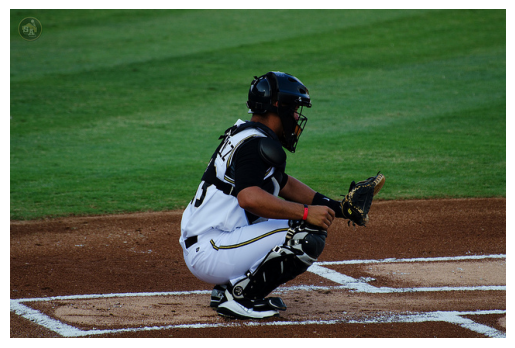

In [7]:
img = mpimg.imread(cocodata)
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
      '''
      "license": 1,
      "file_name": "000000010764.jpg",
      "coco_url": "http://images.cocodataset.org/val2017/000000010764.jpg",
      "height": 424,
      "width": 640,
      "date_captured": "2013-11-19 19:23:45",
      "flickr_url": "http://farm3.staticflickr.com/2714/5810596234_b5090d75f6_z.jpg",
      "id": 10764
      '''

'\n"license": 1,\n"file_name": "000000010764.jpg",\n"coco_url": "http://images.cocodataset.org/val2017/000000010764.jpg",\n"height": 424,\n"width": 640,\n"date_captured": "2013-11-19 19:23:45",\n"flickr_url": "http://farm3.staticflickr.com/2714/5810596234_b5090d75f6_z.jpg",\n"id": 10764\n'

In [9]:
json_seg_data =    {
      "segmentation": [
        [
          235.68,
          241.29,
          260.6,
          186.79,
          272.78,
          165.34,
          294.81,
          139.25,
          309.88,
          144.47,
          313.36,
          134.61,
          304.67,
          125.92,
          306.78,
          108.42,
          318.58,
          84.81,
          338.47,
          80.77,
          360.53,
          82.94,
          383.83,
          99.72,
          389.11,
          117.12,
          390.35,
          126.75,
          379.17,
          126.44,
          376.99,
          136.07,
          385.38,
          141.35,
          372.95,
          170.87,
          370.69,
          178.55,
          367.98,
          187.58,
          354.43,
          179,
          357.59,
          192.55,
          355.34,
          210.62,
          391.47,
          232.75,
          427.16,
          247.66,
          446.77,
          224.18,
          464.17,
          217.01,
          480.04,
          212.92,
          483.62,
          219.57,
          470.82,
          241.58,
          464.17,
          265.12,
          458.54,
          279.45,
          432.44,
          270.75,
          421.18,
          267.17,
          410.44,
          285.08,
          404.3,
          314.25,
          383.83,
          338.81,
          330.6,
          371.05,
          349.03,
          371.56,
          355.68,
          382.31,
          348,
          392.54,
          338.28,
          395.61,
          269.71,
          395.1,
          257.94,
          382.82,
          263.05,
          356.21,
          236.44,
          345.97,
          224.16,
          321.41,
          221.09,
          305.55,
          218.53,
          295.31,
          221.6,
          289.17,
          221.6,
          266.65,
          227.74,
          255.91,
          235.93,
          242.09
        ]
      ],
      "area": 41177.207800000004,
      "iscrowd": 0,
      "image_id": 10764,
      "bbox": [
        218.53,
        80.77,
        265.09,
        314.84
      ],
      "category_id": 1,
      "id": 471070
    },

In [10]:
print(json_seg_data)

({'segmentation': [[235.68, 241.29, 260.6, 186.79, 272.78, 165.34, 294.81, 139.25, 309.88, 144.47, 313.36, 134.61, 304.67, 125.92, 306.78, 108.42, 318.58, 84.81, 338.47, 80.77, 360.53, 82.94, 383.83, 99.72, 389.11, 117.12, 390.35, 126.75, 379.17, 126.44, 376.99, 136.07, 385.38, 141.35, 372.95, 170.87, 370.69, 178.55, 367.98, 187.58, 354.43, 179, 357.59, 192.55, 355.34, 210.62, 391.47, 232.75, 427.16, 247.66, 446.77, 224.18, 464.17, 217.01, 480.04, 212.92, 483.62, 219.57, 470.82, 241.58, 464.17, 265.12, 458.54, 279.45, 432.44, 270.75, 421.18, 267.17, 410.44, 285.08, 404.3, 314.25, 383.83, 338.81, 330.6, 371.05, 349.03, 371.56, 355.68, 382.31, 348, 392.54, 338.28, 395.61, 269.71, 395.1, 257.94, 382.82, 263.05, 356.21, 236.44, 345.97, 224.16, 321.41, 221.09, 305.55, 218.53, 295.31, 221.6, 289.17, 221.6, 266.65, 227.74, 255.91, 235.93, 242.09]], 'area': 41177.207800000004, 'iscrowd': 0, 'image_id': 10764, 'bbox': [218.53, 80.77, 265.09, 314.84], 'category_id': 1, 'id': 471070},)


In [11]:
json_seg_data = json.dumps(json_seg_data)

In [12]:
import json

# 위의 JSON 배열을 문자열로 저장
json_basic_data = '''
[
  {
    "license": 1,
    "file_name": "000000010764.jpg",
    "coco_url": "http://images.cocodataset.org/val2017/000000010764.jpg",
    "height": 424,
    "width": 640,
    "date_captured": "2013-11-19 19:23:45",
    "flickr_url": "http://farm3.staticflickr.com/2714/5810596234_b5090d75f6_z.jpg",
    "id": 10764
  }
]
'''

# JSON 문자열을 Python 리스트로 로드
data_list = json.loads(json_basic_data)

# 결과 출력
print(data_list)


[{'license': 1, 'file_name': '000000010764.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000010764.jpg', 'height': 424, 'width': 640, 'date_captured': '2013-11-19 19:23:45', 'flickr_url': 'http://farm3.staticflickr.com/2714/5810596234_b5090d75f6_z.jpg', 'id': 10764}]


In [13]:
image_path = 'C:\\Users\\gjaischool\\Desktop\\osop\\datasets\\images\\val2017\\000000010764.jpg'



In [14]:
image = Image.open(image_path).convert('RGB')
transform = T.Compose([T.ToTensor()])
image_tensor = transform(image)

print(image_tensor)

tensor([[[0.1333, 0.1333, 0.1294,  ..., 0.1843, 0.1882, 0.1843],
         [0.1412, 0.1451, 0.1490,  ..., 0.2000, 0.2000, 0.1961],
         [0.1451, 0.1608, 0.1647,  ..., 0.2000, 0.1961, 0.1922],
         ...,
         [0.3804, 0.2824, 0.3412,  ..., 0.6784, 0.6196, 0.4627],
         [0.4235, 0.3451, 0.1922,  ..., 0.6745, 0.5922, 0.6706],
         [0.2471, 0.2510, 0.2431,  ..., 0.4706, 0.4941, 0.6745]],

        [[0.3020, 0.2941, 0.2902,  ..., 0.3333, 0.3373, 0.3412],
         [0.3020, 0.3059, 0.3098,  ..., 0.3529, 0.3529, 0.3529],
         [0.3098, 0.3137, 0.3176,  ..., 0.3529, 0.3490, 0.3529],
         ...,
         [0.2745, 0.1725, 0.2588,  ..., 0.7725, 0.7529, 0.4824],
         [0.3294, 0.2471, 0.1059,  ..., 0.7922, 0.6745, 0.7529],
         [0.1255, 0.1529, 0.1451,  ..., 0.5843, 0.5490, 0.7451]],

        [[0.1255, 0.1294, 0.1255,  ..., 0.1333, 0.1373, 0.1373],
         [0.1294, 0.1333, 0.1451,  ..., 0.1451, 0.1451, 0.1451],
         [0.1294, 0.1412, 0.1451,  ..., 0.1373, 0.1333, 0.

In [15]:
import torch
import torchvision.transforms as T
from PIL import Image

In [16]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained = True)
model.eval()


c:\Users\gjaischool\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\gjaischool\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [17]:
print(json_basic_data)


[
  {
    "license": 1,
    "file_name": "000000010764.jpg",
    "coco_url": "http://images.cocodataset.org/val2017/000000010764.jpg",
    "height": 424,
    "width": 640,
    "date_captured": "2013-11-19 19:23:45",
    "flickr_url": "http://farm3.staticflickr.com/2714/5810596234_b5090d75f6_z.jpg",
    "id": 10764
  }
]



In [18]:
print(json_seg_data)

[{"segmentation": [[235.68, 241.29, 260.6, 186.79, 272.78, 165.34, 294.81, 139.25, 309.88, 144.47, 313.36, 134.61, 304.67, 125.92, 306.78, 108.42, 318.58, 84.81, 338.47, 80.77, 360.53, 82.94, 383.83, 99.72, 389.11, 117.12, 390.35, 126.75, 379.17, 126.44, 376.99, 136.07, 385.38, 141.35, 372.95, 170.87, 370.69, 178.55, 367.98, 187.58, 354.43, 179, 357.59, 192.55, 355.34, 210.62, 391.47, 232.75, 427.16, 247.66, 446.77, 224.18, 464.17, 217.01, 480.04, 212.92, 483.62, 219.57, 470.82, 241.58, 464.17, 265.12, 458.54, 279.45, 432.44, 270.75, 421.18, 267.17, 410.44, 285.08, 404.3, 314.25, 383.83, 338.81, 330.6, 371.05, 349.03, 371.56, 355.68, 382.31, 348, 392.54, 338.28, 395.61, 269.71, 395.1, 257.94, 382.82, 263.05, 356.21, 236.44, 345.97, 224.16, 321.41, 221.09, 305.55, 218.53, 295.31, 221.6, 289.17, 221.6, 266.65, 227.74, 255.91, 235.93, 242.09]], "area": 41177.207800000004, "iscrowd": 0, "image_id": 10764, "bbox": [218.53, 80.77, 265.09, 314.84], "category_id": 1, "id": 471070}]


In [19]:
import torch
from torchvision import transforms

# 주어진 데이터
json_seg_data = [{"segmentation": [[235.68, 241.29, 260.6, 186.79, 272.78, 165.34, 294.81, 139.25, 309.88, 144.47, 313.36, 134.61, 304.67, 125.92, 306.78, 108.42, 318.58, 84.81, 338.47, 80.77, 360.53, 82.94, 383.83, 99.72, 389.11, 117.12, 390.35, 126.75, 379.17, 126.44, 376.99, 136.07, 385.38, 141.35, 372.95, 170.87, 370.69, 178.55, 367.98, 187.58, 354.43, 179, 357.59, 192.55, 355.34, 210.62, 391.47, 232.75, 427.16, 247.66, 446.77, 224.18, 464.17, 217.01, 480.04, 212.92, 483.62, 219.57, 470.82, 241.58, 464.17, 265.12, 458.54, 279.45, 432.44, 270.75, 421.18, 267.17, 410.44, 285.08, 404.3, 314.25, 383.83, 338.81, 330.6, 371.05, 349.03, 371.56, 355.68, 382.31, 348, 392.54, 338.28, 395.61, 269.71, 395.1, 257.94, 382.82, 263.05, 356.21, 236.44, 345.97, 224.16, 321.41, 221.09, 305.55, 218.53, 295.31, 221.6, 289.17, 221.6, 266.65, 227.74, 255.91, 235.93, 242.09]], "area": 41177.207800000004, "iscrowd": 0, "image_id": 10764, "bbox": [218.53, 80.77, 265.09, 314.84], "category_id": 1, "id": 471070}]

# 데이터 전처리
preprocessed_data = {
    'image_id': torch.tensor([json_seg_data[0]["image_id"]]),
    'boxes': torch.tensor([json_seg_data[0]['bbox']]),
    'labels': torch.tensor([json_seg_data[0]['category_id']]),
    'masks': torch.tensor(json_seg_data[0]['segmentation']), 
}

print(preprocessed_data)


{'image_id': tensor([10764]), 'boxes': tensor([[218.5300,  80.7700, 265.0900, 314.8400]]), 'labels': tensor([1]), 'masks': tensor([[235.6800, 241.2900, 260.6000, 186.7900, 272.7800, 165.3400, 294.8100,
         139.2500, 309.8800, 144.4700, 313.3600, 134.6100, 304.6700, 125.9200,
         306.7800, 108.4200, 318.5800,  84.8100, 338.4700,  80.7700, 360.5300,
          82.9400, 383.8300,  99.7200, 389.1100, 117.1200, 390.3500, 126.7500,
         379.1700, 126.4400, 376.9900, 136.0700, 385.3800, 141.3500, 372.9500,
         170.8700, 370.6900, 178.5500, 367.9800, 187.5800, 354.4300, 179.0000,
         357.5900, 192.5500, 355.3400, 210.6200, 391.4700, 232.7500, 427.1600,
         247.6600, 446.7700, 224.1800, 464.1700, 217.0100, 480.0400, 212.9200,
         483.6200, 219.5700, 470.8200, 241.5800, 464.1700, 265.1200, 458.5400,
         279.4500, 432.4400, 270.7500, 421.1800, 267.1700, 410.4400, 285.0800,
         404.3000, 314.2500, 383.8300, 338.8100, 330.6000, 371.0500, 349.0300,
        

In [20]:
with torch.no_grad():
    prediction = model([image_tensor], [preprocessed_data])
    print(prediction[0])

{'boxes': tensor([[217.6545,  81.7413, 475.3794, 398.8385],
        [423.4346, 209.7622, 482.9528, 280.6133],
        [421.8737, 231.0463, 466.1833, 280.6935]]), 'labels': tensor([ 1, 40, 40]), 'scores': tensor([0.9996, 0.9883, 0.2104]), 'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ...,

[[217.65446  81.74132 475.37943 398.8385 ]
 [423.4346  209.76218 482.95276 280.6133 ]
 [421.8737  231.04631 466.18332 280.69354]]
[ 1 40 40]
[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]]
[[[0.13333334 0.3019608  0.1254902 ]
  [0.13333334 0.29411766 0.12941177]
  [0.12941177 0.2901961  0.1254902 ]
  ...
  [0.18431373 0.33333334 0.13333334]
  [0.1882353  0.3372549  0.13725491]
  [0.18431373 0.34117648 0.13725491]]

 [[0.14117648 0.3019608  0.12941177]
  [0.14509805 0.30588236 0.13333334]
  [0.14901961 0.30980393 0.14509805]


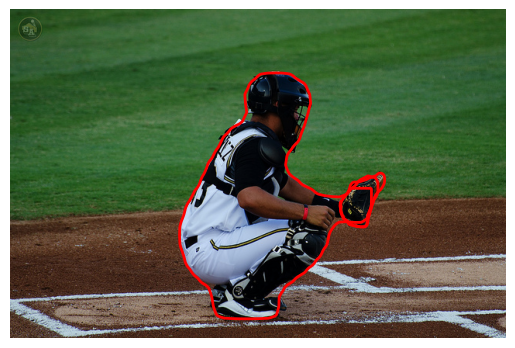

In [21]:
import torch
import torchvision.transforms as T
from torchvision import utils
import matplotlib.pyplot as plt

# Assuming 'prediction' has the format returned by the model

# Extract the predicted boxes, labels, and masks
boxes = prediction[0]['boxes'].cpu().numpy()
print(boxes)
labels = prediction[0]['labels'].cpu().numpy()
print(labels)
masks = prediction[0]['masks'].cpu().numpy()
print(masks)

# Load the original image (assuming 'image_tensor' is a torch.Tensor)
original_image = image_tensor.permute(1, 2, 0).cpu().numpy()
print(original_image)

# Display the original image
plt.imshow(original_image)
plt.axis('off')

# Plot the predicted boxes and masks on the image
for i in range(len(boxes)):
    # Draw bounding box
    box = boxes[i]
    plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill= False, color='red', linewidth=2)
    
    #Draw mask
    mask = masks[i, 0, :, :]  # Assuming binary masks
    plt.contour(mask, colors='red', linewidths=2, levels=[0.5])

plt.show()


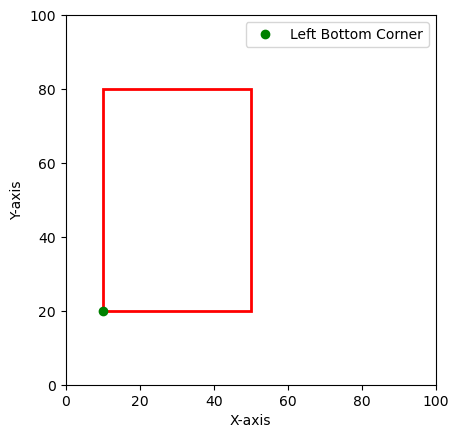

In [22]:
import matplotlib.pyplot as plt

# 가상의 박스 정보
box = [10, 20, 50, 80]  # [left, bottom, right, top]

# Matplotlib Figure와 Axes 생성
fig, ax = plt.subplots()

# 경계 상자 왼쪽 아래 꼭지점 그리기
ax.plot(box[0], box[1], 'go', label='Left Bottom Corner')

# 그림에 경계 상자 추가
rectangle = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color='red', linewidth=2)
ax.add_patch(rectangle)

# 축 레이블 추가
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 범례 추가
ax.legend()

# 그림 표시
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.gca().set_aspect('equal', adjustable='box')  # 가로와 세로의 스케일을 같게 설정
plt.show()


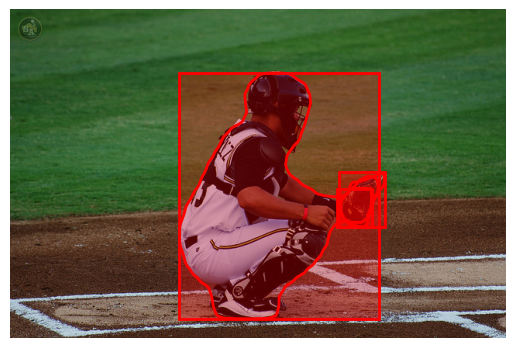

In [23]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Assuming 'prediction' has the format returned by the model

# Extract the predicted boxes, labels, and masks
boxes = prediction[0]['boxes'].cpu().numpy()
labels = prediction[0]['labels'].cpu().numpy()
masks = prediction[0]['masks'].cpu().numpy()

# Load the original image (assuming 'image_tensor' is a torch.Tensor)
original_image = image_tensor.permute(1, 2, 0).cpu().numpy()

# Display the original image
plt.imshow(original_image)
plt.axis('off')

# Plot the predicted boxes and masks on the image
for i in range(len(boxes)):
    # Draw bounding box
    box = boxes[i]
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='red', facecolor='none')
    plt.gca().add_patch(rect)
    
    # Draw mask
    mask = masks[i, 0, :, :]  # Assuming binary masks
    plt.contour(mask, colors='red', linewidths=2, levels=[0.5])

    # Fill the mask area with red color
    plt.fill_betweenx(range(int(box[1]), int(box[3])), box[0], box[2], color='red', alpha=0.3)

plt.show()


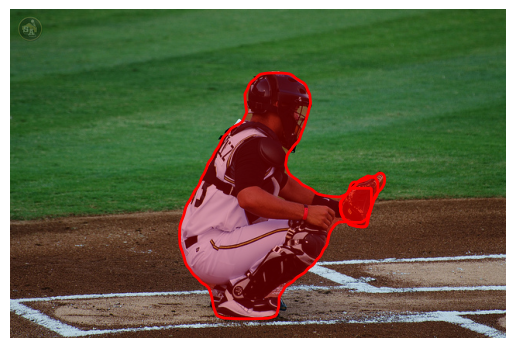

In [24]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Extract the predicted boxes, labels, and masks
boxes = prediction[0]['boxes'].cpu().numpy()
labels = prediction[0]['labels'].cpu().numpy()
masks = prediction[0]['masks'].cpu().numpy()

# Load the original image (assuming 'image_tensor' is a torch.Tensor)
original_image = image_tensor.permute(1, 2, 0).cpu().numpy()

# Display the original image
plt.imshow(original_image)
plt.axis('off')

# Plot the predicted boxes and masks on the image
for i in range(len(boxes)):
    # Draw mask
    mask = masks[i, 0, :, :]  # Assuming binary masks

    # Fill the mask area with red color
    plt.contour(mask, colors='red', linewidths=2, levels=[0.5])
    plt.contourf(mask, levels=[0.5, 1], colors='red', alpha=0.3)

plt.show()


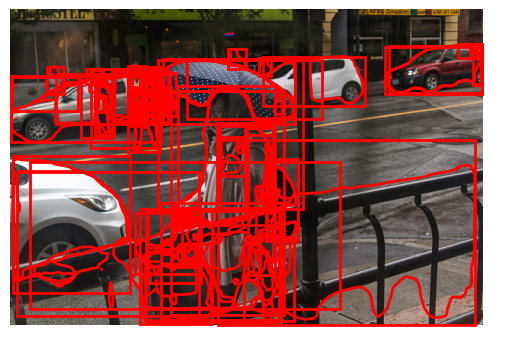

In [25]:
import torch
import torchvision.transforms as T
from torchvision import utils
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Assuming 'model' is your Mask R-CNN model
# Assuming 'image_path' is the path to your input image

# Define the image transformation
transform = T.Compose([T.ToTensor()])
re = 'C:\\Users\\gjaischool\\Desktop\\osop\\datasets\\images\\train2017\\000000574562.jpg'
# Load and preprocess the input image
image = Image.open(re).convert("RGB")
image_tensor = transform(image).unsqueeze(0)

# Make prediction with the model
with torch.no_grad():
    prediction = model(image_tensor)

# Extract the predicted boxes, labels, and masks
boxes = prediction[0]['boxes'].cpu().numpy()
labels = prediction[0]['labels'].cpu().numpy()
masks = prediction[0]['masks'].cpu().numpy()

# Load the original image
original_image = np.array(image)

# Display the original image
plt.imshow(original_image)
plt.axis('off')

# Plot the predicted boxes and masks on the image
for i in range(len(boxes)):
    # Draw bounding box
    box = boxes[i]
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

    # Draw mask
    mask = masks[i, 0, :, :]
    plt.contour(mask, colors='red', linewidths=2, levels=[0.5])

plt.show()


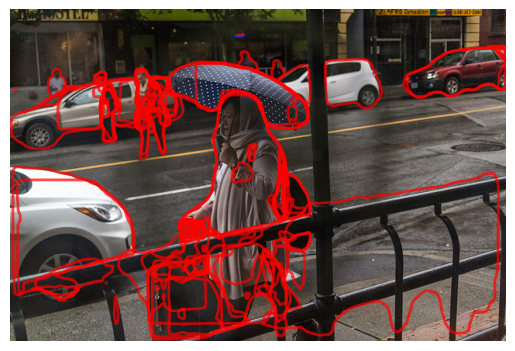

In [26]:
import torch
import torchvision.transforms as T
from torchvision import utils
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image

# Assuming 'model' is your Mask R-CNN model
# Assuming 'image_path' is the path to your input image

# Define the image transformation
transform = T.Compose([T.ToTensor()])

# Load and preprocess the input image
image = Image.open(re).convert("RGB")
image_tensor = transform(image).unsqueeze(0)

# Make prediction with the model
with torch.no_grad():
    prediction = model(image_tensor)

# Extract the predicted boxes, labels, and masks
boxes = prediction[0]['boxes'].cpu().numpy()
labels = prediction[0]['labels'].cpu().numpy()
masks = prediction[0]['masks'].cpu().numpy()

# Load the original image
original_image = np.array(image)

# Display the original image
plt.imshow(original_image)
plt.axis('off')

# Plot the predicted masks on the image
for i in range(len(masks)):
    # Draw mask
    mask = masks[i, 0, :, :]
    plt.contour(mask, colors='red', linewidths=2, levels=[0.5], alpha=0.7)

plt.show()


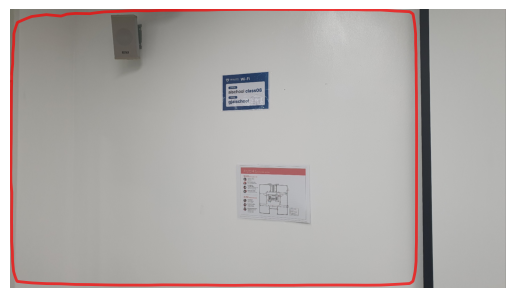

In [27]:
import torch
import torchvision.transforms as T
from torchvision import utils
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image

# Assuming 'model' is your Mask R-CNN model
# Assuming 'image_path' is the path to your input image

# Define the image transformation
transform = T.Compose([T.ToTensor()])

# Load and preprocess the input image
kakao = 'C:\\Users\\gjaischool\\Desktop\\osop\\KakaoTalk_20231201_182931308.jpg'
image = Image.open(kakao).convert("RGB")
image_tensor = transform(image).unsqueeze(0)

# Make prediction with the model
with torch.no_grad():
    prediction = model(image_tensor)

# Extract the predicted boxes, labels, and masks
boxes = prediction[0]['boxes'].cpu().numpy()
labels = prediction[0]['labels'].cpu().numpy()
masks = prediction[0]['masks'].cpu().numpy()

# Load the original image
original_image = np.array(image)

# Display the original image
plt.imshow(original_image)
plt.axis('off')

# Plot the predicted masks on the image
for i in range(len(masks)):
    # Draw mask
    mask = masks[i, 0, :, :]
    plt.contour(mask, colors='red', linewidths=2, levels=[0.5], alpha=0.7)

plt.show()


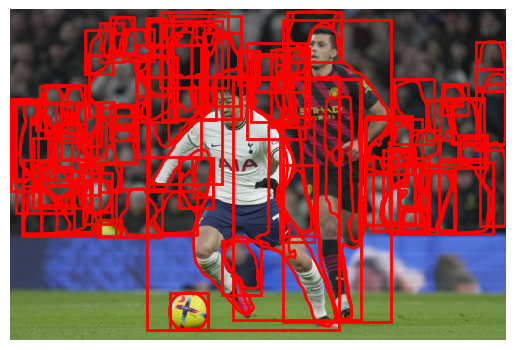

In [28]:
import torch
import torchvision.transforms as T
from torchvision import utils
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image

# Assuming 'model' is your Mask R-CNN model
# Assuming 'image_path' is the path to your input image

# Define the image transformation
transform = T.Compose([T.ToTensor()])
re = 'C:\\Users\\gjaischool\\Desktop\\osop\\KakaoTalk_20231130_171248071.jpg'
# Load and preprocess the input image
image = Image.open(re).convert("RGB")
image_tensor = transform(image).unsqueeze(0)

# Make prediction with the model
with torch.no_grad():
    prediction = model(image_tensor)

# Extract the predicted boxes, labels, and masks
boxes = prediction[0]['boxes'].cpu().numpy()
labels = prediction[0]['labels'].cpu().numpy()
masks = prediction[0]['masks'].cpu().numpy()

# Load the original image
original_image = np.array(image)

# Display the original image
plt.imshow(original_image)
plt.axis('off')

# Plot the predicted boxes and masks on the image
for i in range(len(boxes)):
    # Draw bounding box
    box = boxes[i]
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

    # Draw mask
    mask = masks[i, 0, :, :]
    plt.contour(mask, colors='red', linewidths=2, levels=[0.5])

plt.show()


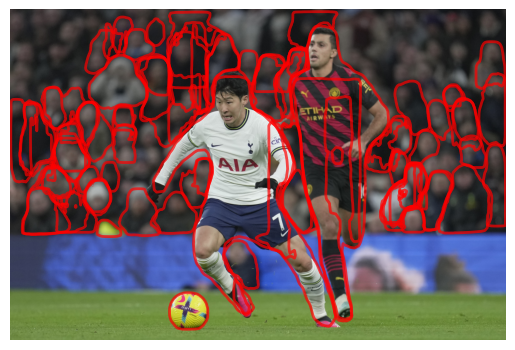

In [29]:
import torch
import torchvision.transforms as T
from torchvision import utils
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image

# Assuming 'model' is your Mask R-CNN model
# Assuming 'image_path' is the path to your input image

# Define the image transformation
transform = T.Compose([T.ToTensor()])

# Load and preprocess the input image
image = Image.open(re).convert("RGB")
image_tensor = transform(image).unsqueeze(0)

# Make prediction with the model
with torch.no_grad():
    prediction = model(image_tensor)

# Extract the predicted boxes, labels, and masks
boxes = prediction[0]['boxes'].cpu().numpy()
labels = prediction[0]['labels'].cpu().numpy()
masks = prediction[0]['masks'].cpu().numpy()

# Load the original image
original_image = np.array(image)

# Display the original image
plt.imshow(original_image)
plt.axis('off')

# Plot the predicted masks on the images
for i in range(len(masks)):
    # Draw mask
    mask = masks[i, 0, :, :]
    plt.contour(mask, colors='red', linewidths=2, levels=[0.5], alpha=0.7)

plt.show()


C:\Users\gjaischool\AppData\Local\Temp\ipykernel_1232\2705208358.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [plt.cm.get_cmap('hsv')(i / num_objects) for i in range(num_objects)]


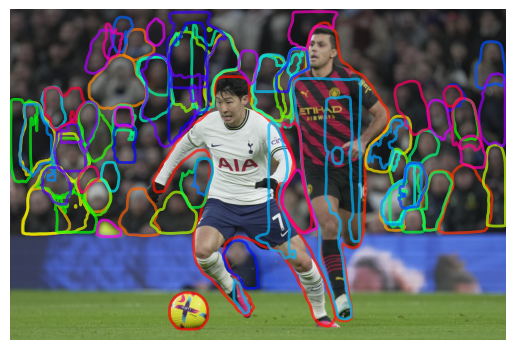

In [30]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

# Assuming 'model' is your Mask R-CNN model
# Assuming 'image_path' is the path to your input image

# Define the image transformation
transform = T.Compose([T.ToTensor()])

# Load and preprocess the input image
image_path = 'C:\\Users\\gjaischool\\Desktop\\osop\\KakaoTalk_20231130_171248071.jpg'  # Replace with the actual path
image = Image.open(image_path).convert("RGB")
image_tensor = transform(image).unsqueeze(0)

# Make prediction with the model
with torch.no_grad():
    prediction = model(image_tensor)

# Extract the predicted boxes, labels, and masks
boxes = prediction[0]['boxes'].cpu().numpy()
labels = prediction[0]['labels'].cpu().numpy()
masks = prediction[0]['masks'].cpu().numpy()

# Load the original image
original_image = np.array(image)

# Display the original image
plt.imshow(original_image)
plt.axis('off')

# Assign a unique color to each object
num_objects = len(masks)
colors = [plt.cm.get_cmap('hsv')(i / num_objects) for i in range(num_objects)]

# Plot the predicted masks on the images
for i in range(len(masks)):
    # Draw mask with a unique color
    mask = masks[i, 0, :, :]
    plt.contour(mask, colors=[colors[i][:3]], linewidths=2, levels=[0.5], alpha=0.7)

plt.show()


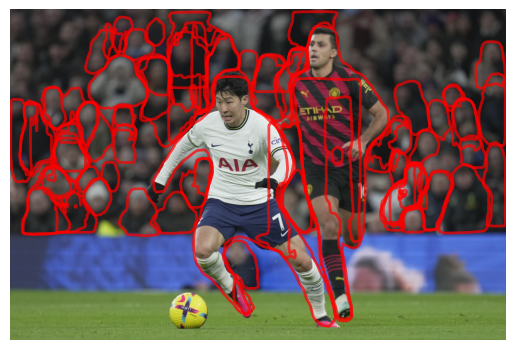

In [31]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Assuming 'model' is your Mask R-CNN model
# Assuming 'image_path' is the path to your input image

# Define the image transformation
transform = T.Compose([T.ToTensor()])

# Load and preprocess the input image
image_path = 'C:\\Users\\gjaischool\\Desktop\\osop\\KakaoTalk_20231130_171248071.jpg'  # Replace with the actual path
image = Image.open(image_path).convert("RGB")
image_tensor = transform(image).unsqueeze(0)

# Make prediction with the model
with torch.no_grad():
    prediction = model(image_tensor)

# Extract the predicted boxes, labels, and masks
boxes = prediction[0]['boxes'].cpu().numpy()
labels = prediction[0]['labels'].cpu().numpy()
masks = prediction[0]['masks'].cpu().numpy()

# Load the original image
original_image = np.array(image)

# Display the original image
plt.imshow(original_image)
plt.axis('off')

# Specify the object labels you want to visualize
desired_labels = [1, 2]  # Replace with the desired labels

# Plot the predicted masks for specified object labels
for i in range(len(labels)):
    if labels[i] in desired_labels:
        # Draw mask
        mask = masks[i, 0, :, :]
        plt.contour(mask, colors='red', linewidths=2, levels=[0.5], alpha=0.7)

plt.show()


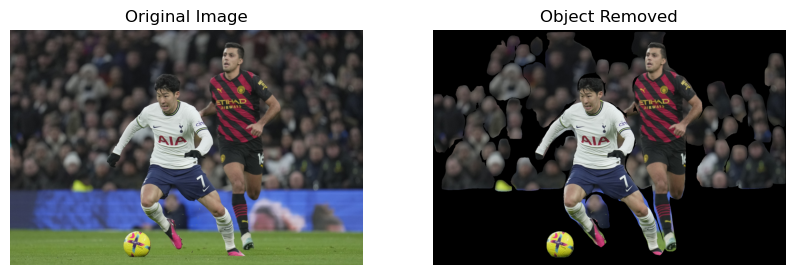

In [32]:
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your Mask R-CNN model
# Assuming 'image_path' is the path to your input image

# Define the image transformation
transform = T.Compose([T.ToTensor()])

# Load and preprocess the input image
image_path = re  # Replace with the actual path
image = Image.open(image_path).convert("RGB")
image_tensor = transform(image).unsqueeze(0)

# Make prediction with the model
with torch.no_grad():
    prediction = model(image_tensor)

# Extract the predicted masks
masks = prediction[0]['masks'].cpu().numpy()

# Load the original image
original_image = np.array(image)

# Create a black image with the same shape as the original image
removed_bg = np.zeros_like(original_image)

# Apply segmentation mask to keep the object and remove the background
for i in range(len(masks)):
    mask = masks[i, 0, :, :]
    removed_bg[mask > 0.5] = original_image[mask > 0.5]

# Display the original and processed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(removed_bg)
plt.title('Object Removed')
plt.axis('off')

plt.show()




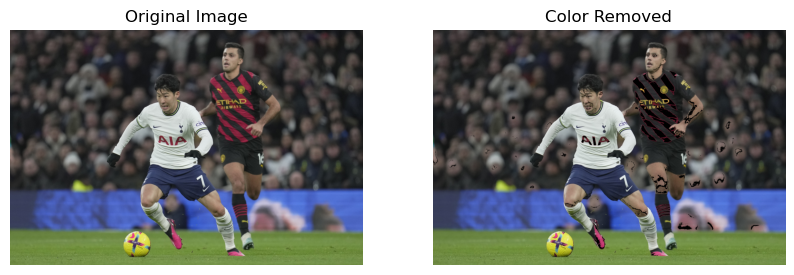

In [33]:
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your Mask R-CNN model
# Assuming 'image_path' is the path to your input image

# Define the image transformation
transform = T.Compose([T.ToTensor()])

# Load and preprocess the input image
image_path = re  # Replace with the actual path
image = Image.open(image_path).convert("RGB")
image_tensor = transform(image).unsqueeze(0)

# Make prediction with the model
with torch.no_grad():
    prediction = model(image_tensor)

# Extract the predicted masks
masks = prediction[0]['masks'].cpu().numpy()

# Load the original image
original_image = np.array(image)

# Define a mask to remove a specific color (e.g., red)
red_mask = (original_image[:, :, 0] > 110) & (original_image[:, :, 1] < 100) & (original_image[:, :, 2] < 100)

# Apply the mask to remove the specified color
removed_color = original_image.copy()
removed_color[red_mask] = 0  # Set the removed color to black

# Display the original and processed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(removed_color)
plt.title('Color Removed')
plt.axis('off')

plt.show()


In [26]:
import cv2
import numpy as np

# Load the original image
image_path = 'C:\\Users\\gjaischool\\Desktop\\osop\\KakaoTalk_20231130_171248071.jpg'  # Replace with the actual path'
original_image = cv2.imread(image_path)

# Create a mask (segmentation map) indicating the region to be removed
mask = np.zeros_like(original_image, dtype=np.uint8)
# Set the region to be removed to white in the mask
mask[5:150, 100:200] = 255

# Apply inpainting to remove the specified region
inpainting_result = cv2.inpaint(original_image, mask[:, :, 0], inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Display the original and inpainted images
cv2.imshow('Original Image', original_image)
cv2.imshow('Inpainted Image', inpainting_result)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
def map_source_class_id(self, source_class_id):
        """Takes a source class ID and returns the int class ID assigned to it.

        For example:
        dataset.map_source_class_id("coco.12") -> 23
        """
        return self.class_from_source_map[source_class_id]

In [ ]:
def annToMask(self, ann, height, width):
    """
    Convert annotation which can be polygons, uncompressed RLE, or RLE to binary mask.
    :return: binary mask (numpy 2D array)
    """
    rle = self.annToRLE(ann, height, width)
    m = maskUtils.decode(rle)
    return m



dd